# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 22.7 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
blosc2 3.3.4 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.
plotnine 0.14.5 req

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# Write your code here to read the data
df = pd.read_csv('foodhub_order.csv')

In [3]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations: There are 1898 rows and 9 columns are present in the data


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: order_id, customer_id, food_preparation_time and delivery time are int. restaurant_name, cuisine_type, day_of_the_week and rating are object. cost_of_the_order is float.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: No missing values


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:It takes minimum 20 mins, average 27.37 mins and maximum 35 mins for food preparation



### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
print(df['rating'].isna().sum())
print(df['rating'].unique())
print((df['rating']== 'Not given').sum())

0
['Not given' '5' '3' '4']
736


#### Observations:736 orders are not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
df['order_id'].nunique()

1898

In [ ]:
df['customer_id'].nunique()

1200

In [ ]:
df['restaurant_name'].nunique()

178

In [ ]:
df['cuisine_type'].nunique()

14

<Axes: xlabel='cuisine_type', ylabel='count'>

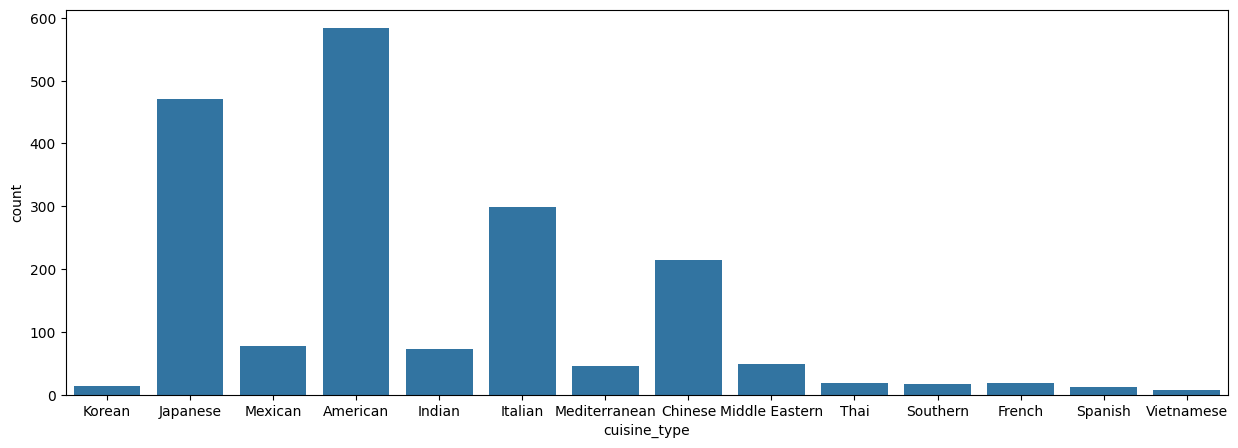

In [ ]:
# Write the code here

plt.figure(figsize=(15,5))
sns.countplot(data=df, x='cuisine_type')

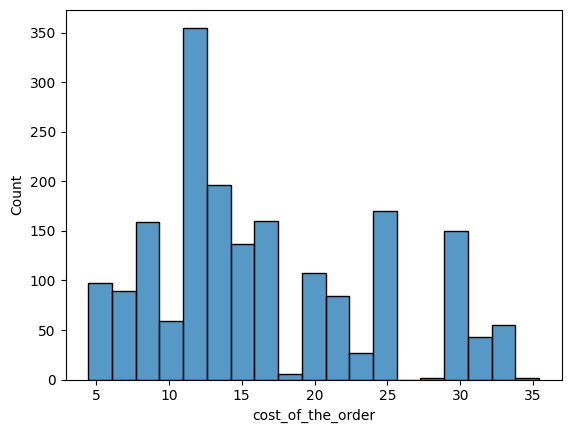

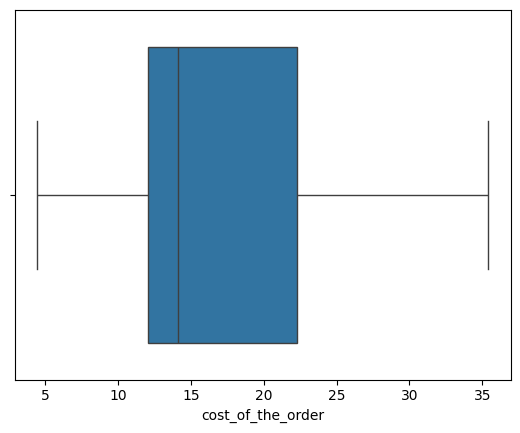

In [ ]:
sns.histplot(data = df, x='cost_of_the_order')
plt.show()

sns.boxplot(data = df, x='cost_of_the_order')
plt.show()

<Axes: xlabel='day_of_the_week', ylabel='count'>

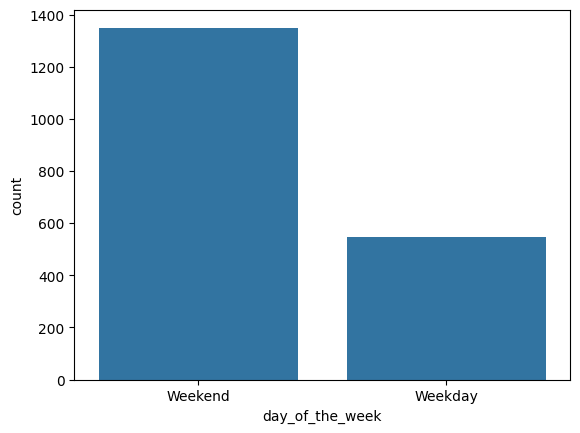

In [ ]:
sns.countplot(x='day_of_the_week',data=df)

['Not given' '5' '3' '4']


<Axes: xlabel='rating', ylabel='count'>

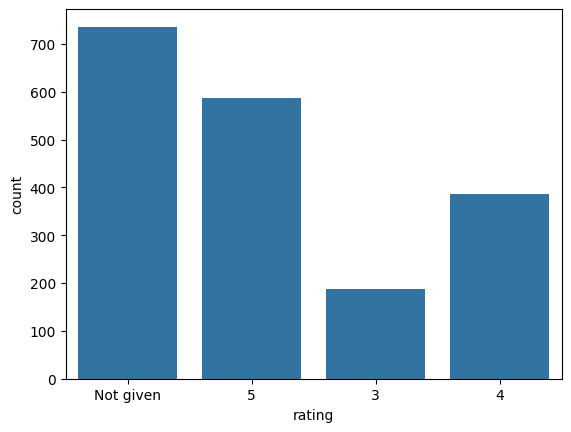

In [ ]:
print(df['rating'].unique())
sns.countplot(x='rating',data=df)

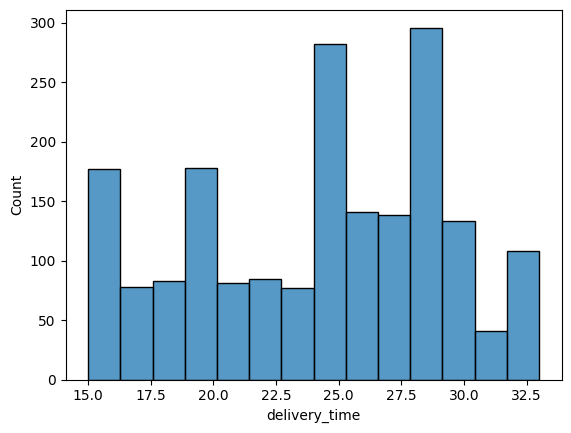

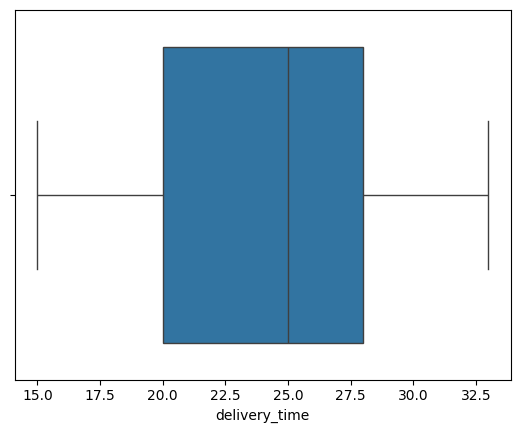

In [ ]:
sns.histplot(data = df, x='delivery_time')
plt.show()

sns.boxplot(data = df, x='delivery_time')
plt.show()

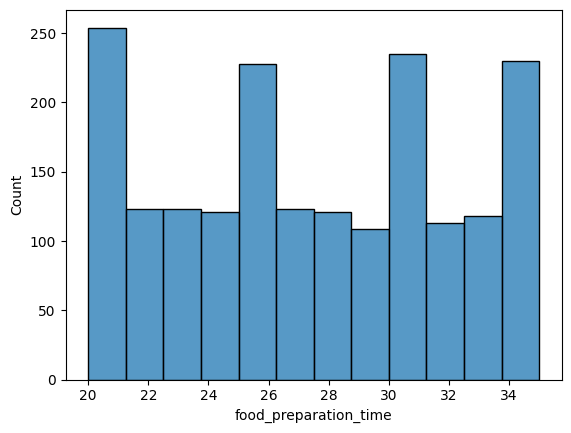

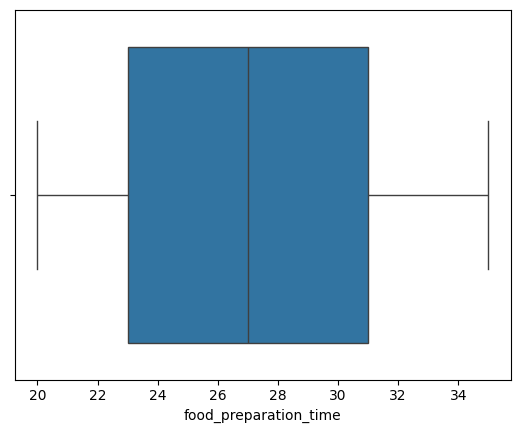

In [ ]:
sns.histplot(data = df, x='food_preparation_time')
plt.show()

sns.boxplot(data = df, x='food_preparation_time')
plt.show()

Observations:

1. Total 1898 unique orders are there
1. 1200 unique customers are there in the data
2. 178 unique restaurants are there in the data
3. 14 unique cuisines are there in the data
4. 'American', 'Japanese' and 'Italian' are top 3 cuisines
5. Cost of order is slightly right skewed
6. More orders are placed on weekends compared to weekdays
7. There are lot of orders that does not have any rating
8. Food preparation time is between 20 to 35 mins
9. Delivery time is between 15 and 33 mins
11. No outliers for delivery time and food preparation time

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
df['restaurant_name'].value_counts().head()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm  are the top 5 restaurants in terms of the number of orders received.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts()

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Middle Eastern,32
Mediterranean,32
Thai,15


#### Observations:
1. American cuisine is the most popular during weekends



### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
round((df[df['cost_of_the_order']>20].shape[0]/df.shape[0])*100 , 2)

29.24

#### Observations:29.24% of the orders cost more than 20 dollars


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
round(df['delivery_time'].mean(), 2)

np.float64(24.16)

#### Observations: mean order delivery time is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:top 3 customer ids are 52832, 47440, 83287. 52832 placed 13 orders, 47440 placed 10 orders and 83287 placed 9 orders.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


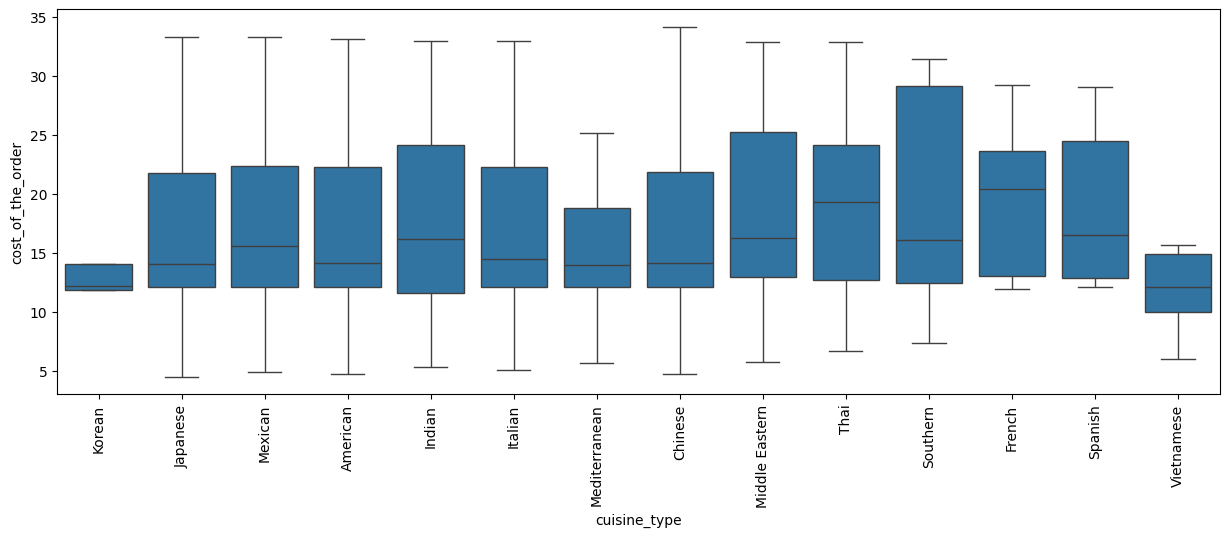

In [ ]:

#Relationship between cuisine type and cost of the order
plt.figure(figsize=(15,5))
sns.boxplot(x='cuisine_type',y='cost_of_the_order',data=df, showfliers = False)
plt.xticks(rotation=90)
plt.show()

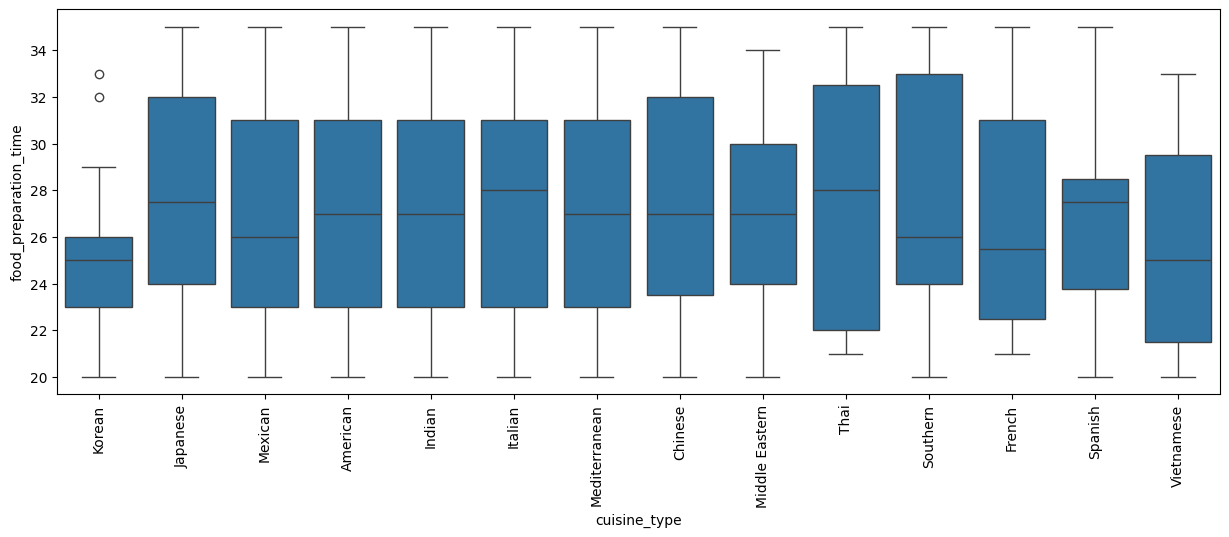

In [ ]:
#Relationship between cuisine type and food preparation time
plt.figure(figsize=(15,5))
sns.boxplot(x='cuisine_type',y='food_preparation_time',data=df)
plt.xticks(rotation=90)
plt.show()

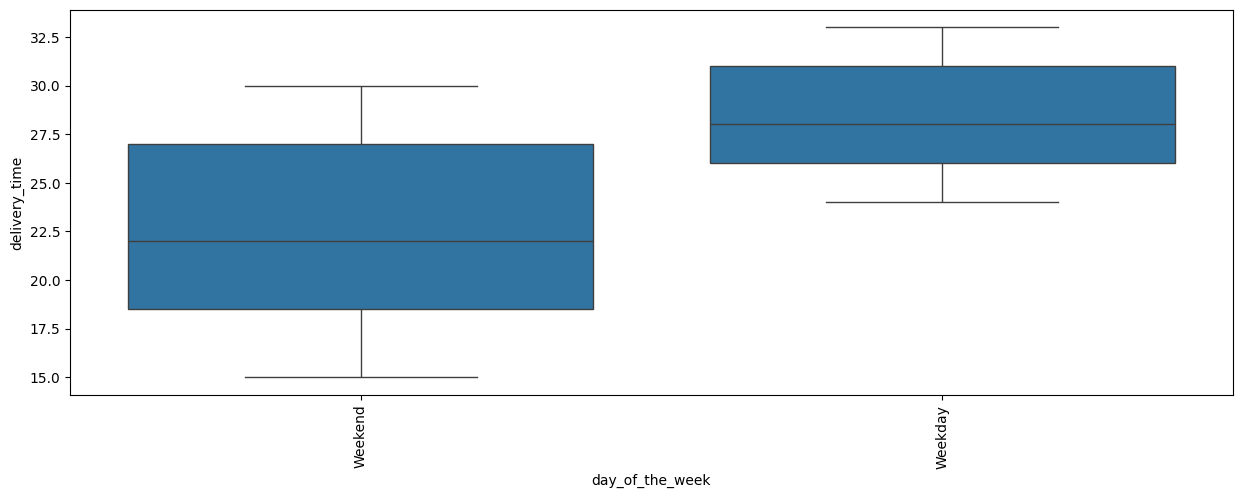

In [ ]:
#Relationship between. day of the week and delivery time
plt.figure(figsize=(15,5))
sns.boxplot(x='day_of_the_week',y='delivery_time',data=df)
plt.xticks(rotation=90)
plt.show()

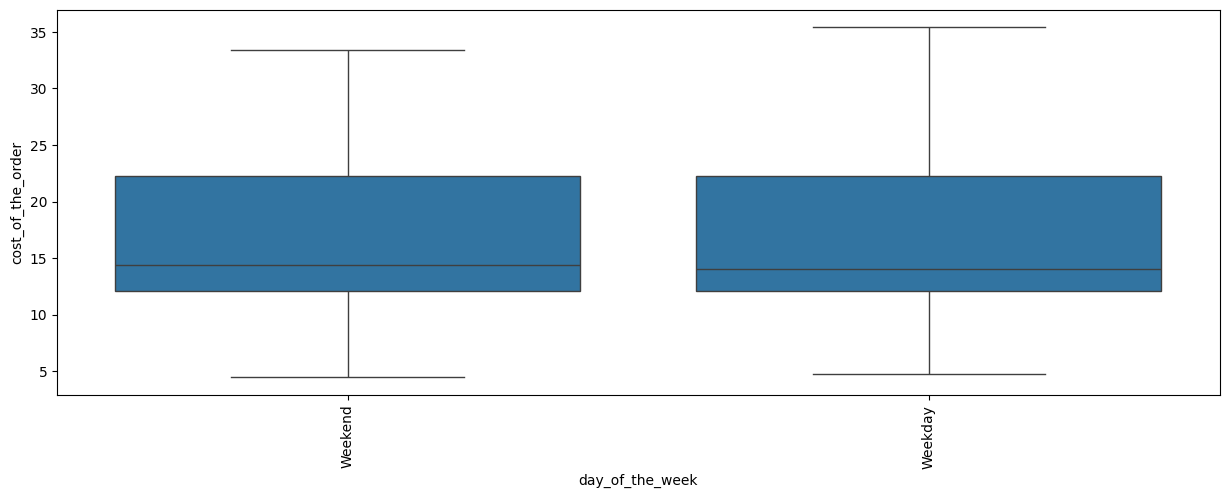

In [ ]:
#Relationship between. day of the week and Cost of the order
plt.figure(figsize=(15,5))
sns.boxplot(x='day_of_the_week',y='cost_of_the_order',data=df)
plt.xticks(rotation=90)
plt.show()

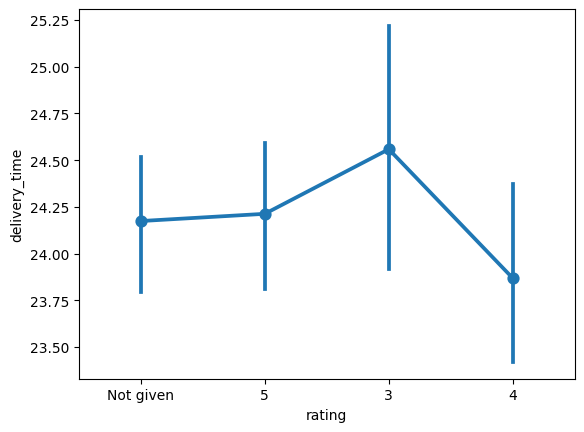

In [ ]:
#Relationship between Rating and Delivery time
sns.pointplot(x='rating',y='delivery_time',data=df)
plt.show()

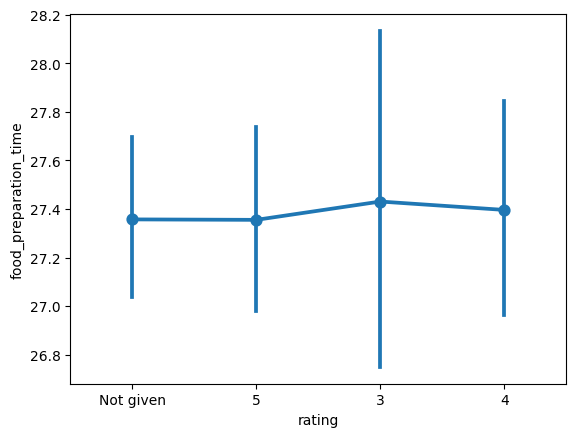

In [ ]:
#Relationship between Rating and Food Preparation time
sns.pointplot(x='rating',y='food_preparation_time',data=df)
plt.show()

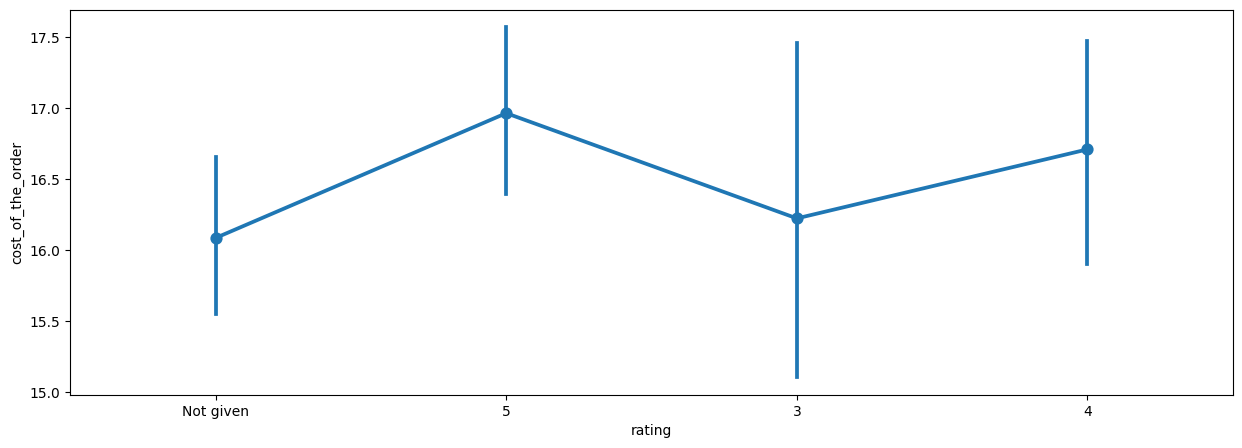

In [ ]:
#Relationship between Rating and cost of the order
plt.figure(figsize=(15,5))
sns.pointplot(x='rating',y='cost_of_the_order',data=df)
plt.show()

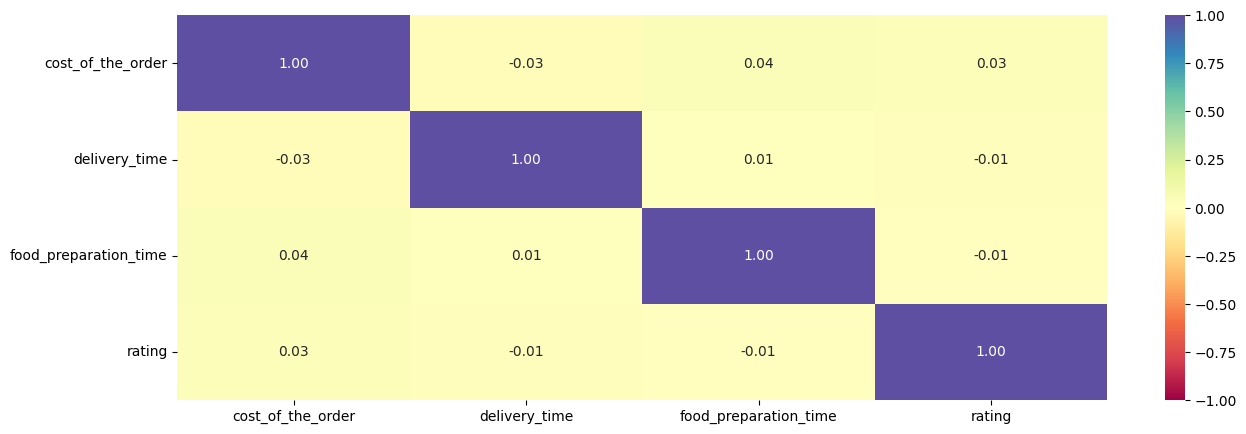

In [ ]:
#Heatmap of cost of the order, delivery time and food preparation time
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
plt.figure(figsize=(15,5))
sns.heatmap(df[['cost_of_the_order','delivery_time','food_preparation_time','rating']].corr(),annot=True, vmin=-1, vmax=1, fmt="0.2f", cmap="Spectral")
plt.show()

Observations:
1. Order delivery time is more on weekdays compared to weekends
2. Customers has given lower rating when delivery time is more.
3.
4. Positive corelation between cost of the order and food preparation time.
5. Negative corelation between Cost of the order and delivery time.
6. Negative corelation between rating and delivery time

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
df_rated = df[df['rating'] != 'Not given'].copy()

df_rated['rating'] = df_rated['rating'].astype(int)

df_rating_count = df_rated.groupby('restaurant_name')['rating'].count().sort_values(ascending = False).reset_index()
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

df_mean_4_rating = df_mean_4.groupby('restaurant_name')['rating'].mean().sort_values(ascending = False).reset_index()


df_avg_rating_greater_than_4 = df_mean_4_rating[df_mean_4_rating['rating'] > 4].sort_values(by = 'rating', ascending = False)
print(df_avg_rating_greater_than_4)

             restaurant_name    rating
0          The Meatball Shop  4.511905
1  Blue Ribbon Fried Chicken  4.328125
2                Shake Shack  4.278195
3          Blue Ribbon Sushi  4.219178


Observations: The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack and Blue Ribbon Sushi will get the promotional offer

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here

def calculate_revenue(x):
    if x > 20:
      return x * 0.25
    elif x > 5:
      return x * 0.15
    else:
      return 0

df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)
total_revenue = df['revenue'].sum().round(2)

print('The net revenue is', total_revenue, 'dollars')

The net revenue is 6166.3 dollars


#### Observations:The net revenue generated by the company across all orders is 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

df['total_time'] = df['food_preparation_time'] + df['delivery_time']
total_time_more_than_60_mins = (df[df['total_time']>60].shape[0]/df.shape[0])*100
print (round(total_time_more_than_60_mins, 2), 'percentage of orders take more than 60 minutes to get delivered')

10.54  percentage of orders take more than 60 minutes to get delivered


#### Observations:10.54  percentage of orders take more than 60 minutes to get delivered from the time the order is placed


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
df.groupby('day_of_the_week')['delivery_time'].mean().round(2)

,delivery_time
day_of_the_week,
Weekday,28.34
Weekend,22.47


#### Observations:
The mean delivery time is higher on weekday compared to weekend

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

1. Top 5 Most Popular Restaurants:
    * Shake Shack
    * The Meatball Shop
    * Blue Ribbon Sushi
    * Blue Ribbon Fried Chicken
    * Parm
2. Top 5 Cuisine Types:
    * American
    * Japanese
    * Italian
    * Chinese
    * Mexican
3. Order Cost:
    * Average order cost 16.49 dollars
4. Customer Ratings:
    * Customers has given lower rating when delivery time is more.
    * Ratings were not provided in 736 orders
5. Timings
    * Average food preparation time: 27.37 minutes
    * Average delivery time: 24.16 minutes
    * 10.54  percentage of orders took more than 60 minutes to get delivered
6. Weekday vs Weekends
    * More orders are placed on weekends
    * Delivery time is more on weekdays
    

### Recommendations:

1. Improve Customer Rating. A large number of orders have 'Not given' rating. Encourage customers to provide rating by providing discount on next order or sending reminder in email or text message to rate the order.
2. Boost weekday sales by providing some weekday only discounts or some offer for weekday only along with weekend order.
3. Partner with Restaurants with American, Japanese and Italian cuisine type
4. 10.54 percentage of orders took more than 60 minutes to get delivered. This requires some investigation.

---